# Analysis of Player Value in Competitive Pokemon Leagues

## Overview
This notebook analyzes the relationship between auction prices and player performance across multiple competitive Pokemon leagues:
- SPL (Smogon Premier League): 2016-2025
- SCL (Smogon Championship League): 2021-2025
- UUPL (UnderUsed Premier League): 2020-2025

The analysis aims to determine whether there's a correlation between the auction price paid for players and their win percentage in matches. This can help evaluate:
- Return on investment for team managers
- Player valuation efficiency in auctions
- Historical trends in player performance relative to cost

## Methodology
We aggregate data from multiple seasons using Google Sheets, extracting win percentages and auction prices for each player using Pandas. The visualization shows the relationship between these variables to identify any patterns or trends.

## Limitations
Player value is often an subjective metric and does not exclusively depend on win percentage. A player's value also includes their effect on the team with respect to teambuilding support and morale, amongst other factors. Furthermore, auction prices are not always indicative of a player's true value, as they can be influenced by factors such as team needs, market demand, and other extraneous factors. For example, a team may spend a lot of money on a player that they value at the minimum value because they only have one roster spot left so they might as well spend all their remaining money.

A 5 year sample size is also likely too small to draw any meaningful conclusions. Unfortunately, in many cases, the data is not available for a longer time period.


In [1]:
from grouped import aggregate_multiple_spreadsheets
from visualization import plot_results,plot_scatter 


def extract_sheet_id(url):
    start = url.find('/d/') + 3
    end = url.find('/', start)
    return url[start:end]


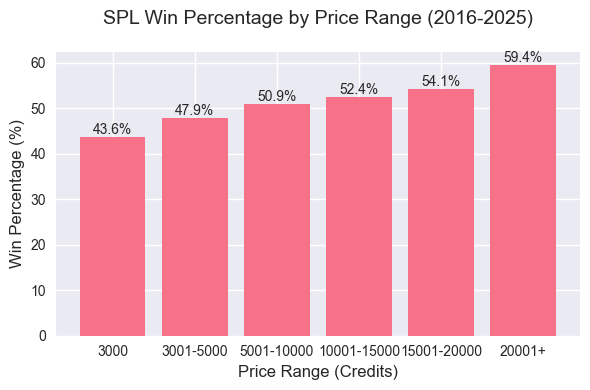


SPL Win Percentage by Price Range (2016-2025):
3000: 43.6%
3001-5000: 47.9%
5001-10000: 50.9%
10001-15000: 52.4%
15001-20000: 54.1%
20001+: 59.4%


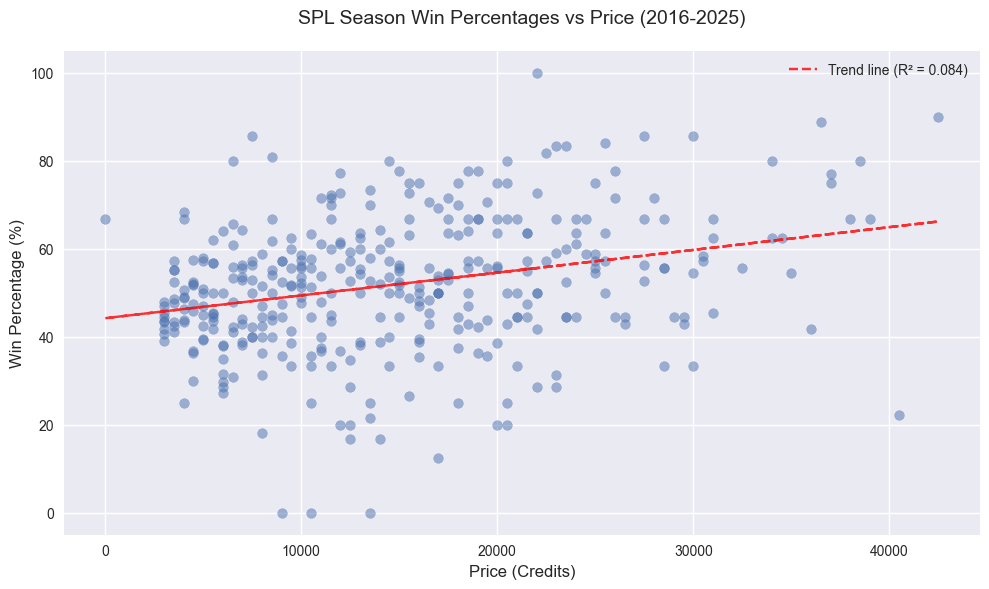

In [2]:
with open('spreadsheet_links/spreadsheets_spl.txt', 'r') as f:
    sheet_ids = [extract_sheet_id(line.strip()) 
                for line in f 
                if line.strip()]

# Get both grouped results and raw data
spl_results, spl_raw = aggregate_multiple_spreadsheets(sheet_ids)

# Create both visualizations
plot_results(spl_results, 'SPL Win Percentage by Price Range (2016-2025)')
plot_scatter(spl_raw, 'SPL Season Win Percentages vs Price (2016-2025)')

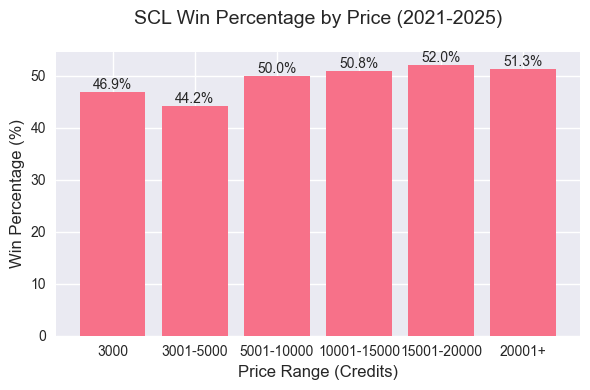


SCL Win Percentage by Price (2021-2025):
3000: 46.9%
3001-5000: 44.2%
5001-10000: 50.0%
10001-15000: 50.8%
15001-20000: 52.0%
20001+: 51.3%


In [3]:
with open('spreadsheet_links/spreadsheets_scl.txt', 'r') as f:
    sheet_ids = [extract_sheet_id(line.strip()) 
                for line in f 
                if line.strip()]

scl_results, scl_raw = aggregate_multiple_spreadsheets(sheet_ids)
plot_results(scl_results, 'SCL Win Percentage by Price (2021-2025)')

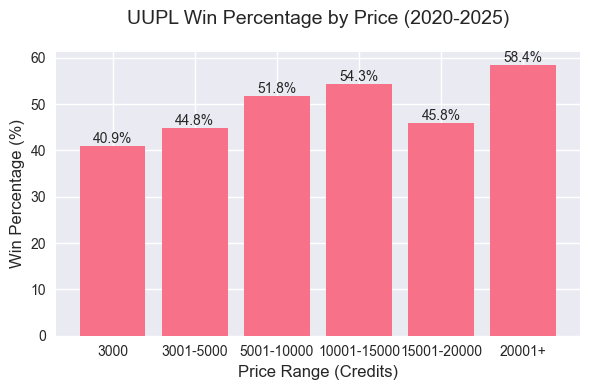


UUPL Win Percentage by Price (2020-2025):
3000: 40.9%
3001-5000: 44.8%
5001-10000: 51.8%
10001-15000: 54.3%
15001-20000: 45.8%
20001+: 58.4%


In [4]:
with open('spreadsheet_links/spreadsheets_uupl.txt', 'r') as f:
    uupl_sheet_ids = [extract_sheet_id(line.strip()) 
                for line in f 
                if line.strip()]
uupl_results, uupl_raw = aggregate_multiple_spreadsheets(uupl_sheet_ids)
plot_results(uupl_results, 'UUPL Win Percentage by Price (2020-2025)')

What is the most efficient allocation of credits to optimize win percentage? There are fundamental constraints, you only have 120,000 credits per team. You also only have 12 starting roster spots per team. We can use a model similar to WAR (Wins Above Replacement) used in baseball. At any point in time you can find a minimum value player (3000) to win around 44% of their games. By spending more, how many more wins do you get? Is it better to buy 21000 + 3000 or 12000 + 12000? This turns into an optimization problem.

In [ ]:
# ... existing code ...

in[6]: def compare_allocation_strategies(data, strategy1, strategy2):
    """
    Compare two different credit allocation strategies to see which produces more expected wins.
    
    Args:
        data: DataFrame with price and win_rate columns
        strategy1: List of prices for first strategy
        strategy2: List of prices for second strategy
    
    Returns:
        Tuple of (strategy1_wins, strategy2_wins, difference)
    """
    def get_expected_wins(prices):
        # Get the closest price points in our data and their win rates
        expected_win_rates = []
        for price in prices:
            closest_price_idx = (data['price'] - price).abs().idxmin()
            expected_win_rates.append(data.loc[closest_price_idx, 'win_rate'])
        return sum(expected_win_rates) / len(expected_win_rates)
    
    strat1_wins = get_expected_wins(strategy1)
    strat2_wins = get_expected_wins(strategy2)
    
    return strat1_wins, strat2_wins, strat1_wins - strat2_wins

# Compare 21k + 3k vs 12k + 12k
strategy1 = [21000, 3000]
strategy2 = [12000, 12000]

spl_strat1, spl_strat2, spl_diff = compare_allocation_strategies(spl_raw, strategy1, strategy2)

print(f"SPL Analysis:")
print(f"Strategy 1 (21k + 3k): {spl_strat1:.1%} expected win rate")
print(f"Strategy 2 (12k + 12k): {spl_strat2:.1%} expected win rate")
print(f"Difference: {spl_diff:.1%} in favor of {('Strategy 1' if spl_diff > 0 else 'Strategy 2')}")